# Predicting Diabetes using K-Nearest Neighbors (KNN)

## ♡Import Libraries♡

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Load Dataset

In [4]:
df = pd.read_csv("C:/Users/AHMAD KHAN/Downloads/Diabetes Prediction.csv") 

## ✿ Exploratory Data Analysis(EDA) ✿

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
styled_df = df.head(10).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.000000,0,1,never,25.190000,6.600000,140,0
1,Female,54.000000,0,0,No Info,27.320000,6.600000,80,0
2,Male,28.000000,0,0,never,27.320000,5.700000,158,0
3,Female,36.000000,0,0,current,23.450000,5.000000,155,0
4,Male,76.000000,1,1,current,20.140000,4.800000,155,0
5,Female,20.000000,0,0,never,27.320000,6.600000,85,0
6,Female,44.000000,0,0,never,19.310000,6.500000,200,1
7,Female,79.000000,0,0,No Info,23.860000,5.700000,85,0
8,Male,42.000000,0,0,never,33.640000,4.800000,145,0
9,Female,32.000000,0,0,never,27.320000,5.000000,100,0


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Basic Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Check Missing Values 

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Check Duplicate

In [10]:
 # check duplicate values
print(df.duplicated().sum())
# remove duplicate values
df = df.drop_duplicates()
print("______Removed Duplicate______")
print(df.duplicated().sum())

3854
______Removed Duplicate______
0


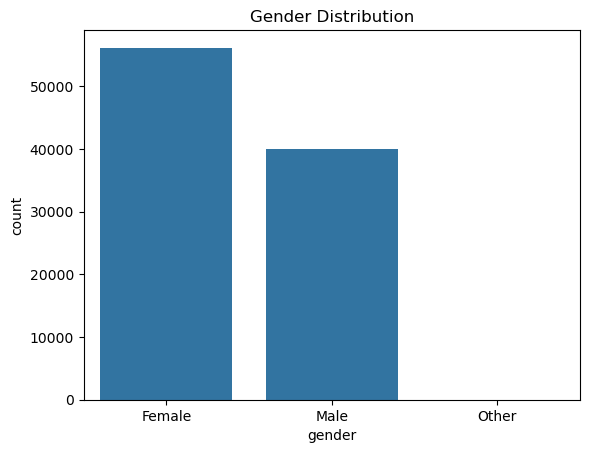

In [11]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

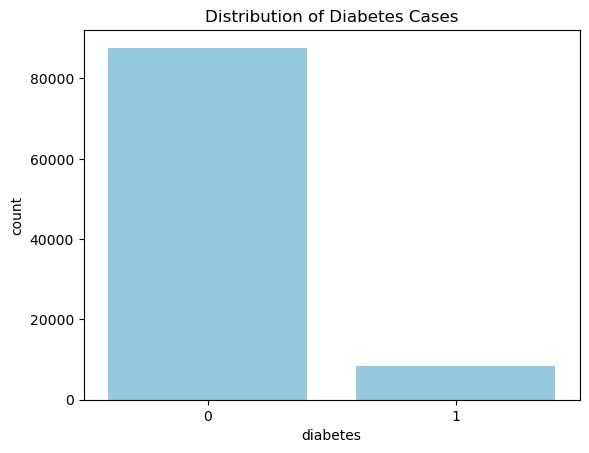

In [12]:
# Distribution of target variable
sns.countplot(data=df, x='diabetes', color='skyblue')
plt.title("Distribution of Diabetes Cases")
plt.show()


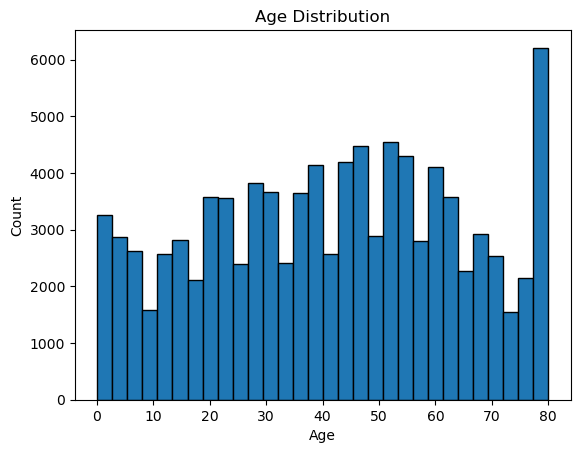

In [13]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

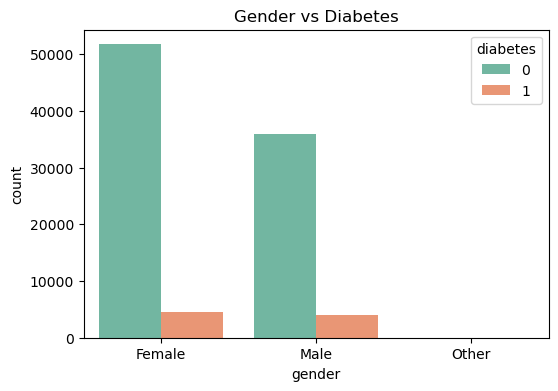

In [14]:
# Gender vs Diabetes
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='diabetes', palette='Set2')
plt.title("Gender vs Diabetes")
plt.show()

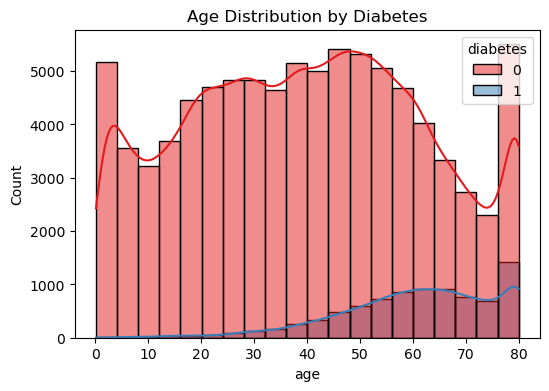

In [15]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='diabetes', bins=20, kde=True, palette='Set1')
plt.title("Age Distribution by Diabetes")
plt.show()

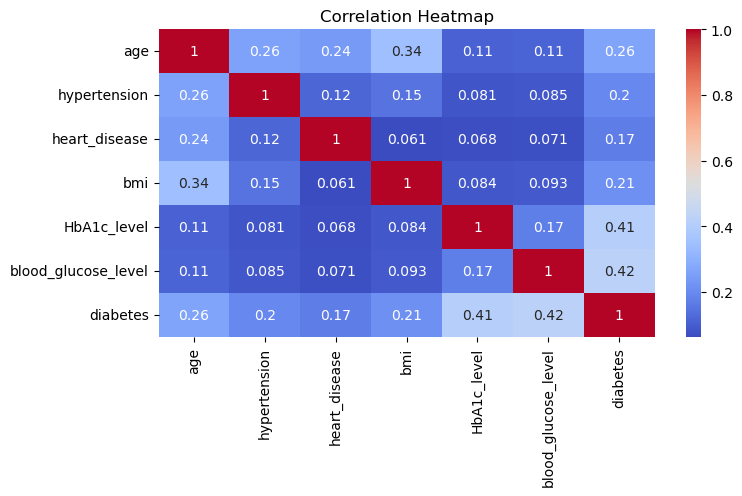

In [16]:
# Correlation Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

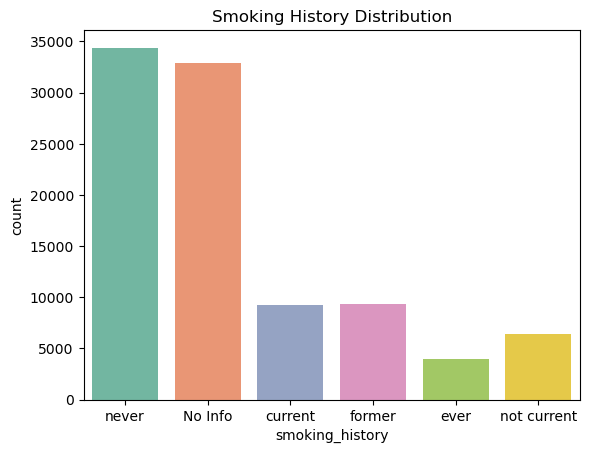

In [17]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df, hue='smoking_history', palette='Set2', legend=False)
plt.title("Smoking History Distribution")
plt.show()


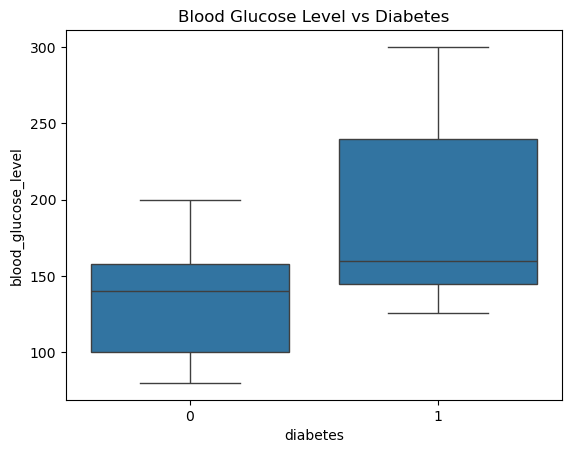

In [18]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

## 4. Preprocessing


In [19]:
# Encode categorical columns
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

le_smoke = LabelEncoder()
df['smoking_history'] = le_smoke.fit_transform(df['smoking_history'])


In [20]:
# Features (X) and Target (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']


In [21]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 5. Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 6. Apply KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## 7. Evaluation

In [26]:
y_pred = knn.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.959334373374935

Confusion Matrix:
 [[17484    25]
 [  757   964]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     17509
           1       0.97      0.56      0.71      1721

    accuracy                           0.96     19230
   macro avg       0.97      0.78      0.84     19230
weighted avg       0.96      0.96      0.95     19230



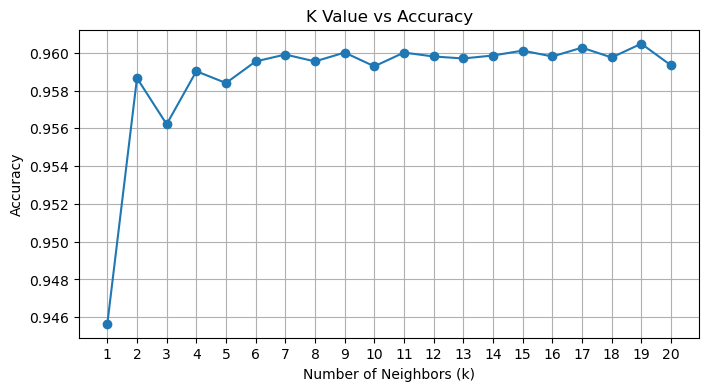

In [27]:
# 6. Accuracy vs K Plot
# ------------------------------
accuracy = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(8,4))
plt.plot(range(1, 21), accuracy, marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()